# **Master in Data Science - Machine Learning**

Authors: Frida Ibarra y Gema Romero

### **About the Dataset**

This project aims to develop a model to predict loan defaults using individual customer data. The goal is to create a model that, based on information such as income and employment status, can estimate the probability of a customer defaulting on a loan.

It is essential to ensure that the model is fair and does not discriminate against any group of individuals. For this reason, special attention will be paid to variables like gender, which are protected by law and should not influence credit decisions.  

### **Business Case**

Objective: Predicting Payment Difficulties

The goal of this project is to develop a robust predictive model to determine the likelihood of loan approval for potential clients, based on diverse input variables such as income, credit history, employment status, and debt-to-income ratio. Accurate prediction of loan approvals can optimize the loan evaluation process, improve operational efficiency, and reduce default risks.

A critical aspect of this model is compliance with regulations prohibiting bias in decision-making processes. Variables such as race, gender, ethnicity, or other protected attributes must not influence loan approval outcomes. The model will be designed to ensure fairness by excluding these attributes from direct consideration and implementing fairness-aware machine learning techniques to mitigate any indirect bias.

This approach ensures that the model aligns with regulatory standards while maintaining accuracy, fairness, and transparency. By leveraging advanced analytics, the institution will enhance customer trust, uphold ethical standards, and promote equitable financial inclusion.

**Business Case Objectives: Improving Credit Risk Management**
- Mitigating Credit Risk: Proactively identify and address potential loan defaults.
- Streamlining Operations: Automate and optimize the loan evaluation process for cost savings.
- Personalized Customer Engagement: Tailor offerings based on customer risk profiles.
- Customer Satisfaction: Enhance the customer experience through efficient and transparent processes.
- Maximizing Returns: Optimize the loan portfolio for profitability while minimizing losses.
- Data-Driven Decision Making: Empower leadership with actionable insights for strategic decision-making.


### **Objectives and Work Plan:**

**1. Exploratory Data Analysis (EDA):**

- Understand the distribution of variables and identify patterns or anomalies that might affect payment behavior. 
- Explore relationships between key variables to uncover potential predictors of difficulties. 
- Investigate the balance of the target variable (payment difficulty: yes/no) to determine if techniques to address class imbalance are needed. 

**2. Model Development**
- Model Selection: Evaluate multiple algorithms such as logistic regression, decision trees, random forests, and gradient boosting to identify the best-performing model.
- Hyperparameter Tuning: Optimize model parameters to achieve better predictive performance.
- Cross-Validation: Validate the model using different subsets of data to ensure its robustness and reliability
- Implement the final model, evaluate it, and draw conclusions based on the results obtained.

**3. Handling Imbalanced Data**
- If customers facing payment difficulties are underrepresented, techniques such as oversampling (e.g., SMOTE) or undersampling will be applied to balance the dataset.
- Test the impact of balancing techniques on model performance to ensure fair evaluation of predictions.

**4. Evaluation and Metrics**
- Use metrics like AUC-ROC, precision, recall, and F1-score to assess the model's effectiveness in identifying payment difficulties.
- Focus on minimizing false negatives, as incorrectly predicting a customer will not face difficulties could lead to financial losses.

**5. Explainability**

- Provide clear insights into the internal workings of the model using specific interpretability tools.
- Identify the most and least influential variables in the model’s decision-making process.
- Understand how the model makes decisions in different cases and how variables influence these decisions.
- Dive deeper into key topics related to model interpretability, ensuring a comprehensive understanding of the model and its behavior.



**6. Final Conclusions**

- Present the key findings derived from the analysis and modeling process. These conclusions summarize the insights gained about the dataset, the relationships between variables, and the performance of the predictive models, offering a comprehensive overview of the results and their implications.  

### LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import openpyxl
import missingno as msno
from colorama import Fore, Style
import seaborn as sns
import matplotlib.pyplot as plt
import sys  
import plotly.express as px

### AUXILIAR FUNCTIONS

In [2]:
sys.path.append('../src/')
import functions_src as fa
sys.path.remove('../src/')

### DATASET

In [3]:
#Get the current working directory path
current_path = os.getcwd()
current_path

'c:\\Users\\bris2\\Desktop\\GemaMaster\\Aprendizaje\\practica1_EDA\\notebooks'

In [4]:
#Importing the dataset
data = '../data/application_data.csv'
df_loans = pd.read_csv(data)

In [5]:
df_loans.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Importing the datasets' dictionary
dictionary = '../data/columns_description.xlsx'
data_description = pd.read_excel(dictionary) 
data_description

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


### **1. EXPLORATORY DATA ANALYSIS (EDA):**

The analysis aimed to understand the dataset and pinpoint factors affecting payment behavior. We explored variable distributions for patterns, checked for class imbalance in the target variable, and examined relationships between predictors and the default outcome. Outliers and missing data were addressed, and the predictive power of variables was evaluated using WOE and IV analysis

#### **I. PRELIMINARY DATASET ANALYSIS**  

In this section, we will conduct an initial exploration of the dataset to understand its structure and components. This involves examining the variables, their types, and distributions, as well as identifying missing values, outliers, and potential inconsistencies. The objective is to establish a solid foundation for further analysis and ensure the dataset is ready for subsequent modeling processes.

In [7]:
# 1 Dimensions of the dataset
df_loans.shape
print('The dimensions of the dataframe consist of', df_loans.shape[0], 'instances and', df_loans.shape[1], 'variables')


The dimensions of the dataframe consist of 307511 instances and 122 variables


In [8]:
# Number of null values per column
nulls_per_column = df_loans.isnull().sum()

# Percentage of null values per column (nulls per column divided by the total number of rows)
null_percentage_per_column = (nulls_per_column / df_loans.shape[0]) * 100

# Create a DataFrame with the results
nulls_df = pd.DataFrame({
    'nulls': nulls_per_column,
    'percentage': null_percentage_per_column
})

# Display the DataFrame sorted by the percentage of nulls
nulls_df = nulls_df.sort_values(by='percentage', ascending=False)
print(nulls_df.to_string())

                               nulls  percentage
COMMONAREA_AVG                214865   69.872297
COMMONAREA_MODE               214865   69.872297
COMMONAREA_MEDI               214865   69.872297
NONLIVINGAPARTMENTS_MEDI      213514   69.432963
NONLIVINGAPARTMENTS_MODE      213514   69.432963
NONLIVINGAPARTMENTS_AVG       213514   69.432963
FONDKAPREMONT_MODE            210295   68.386172
LIVINGAPARTMENTS_AVG          210199   68.354953
LIVINGAPARTMENTS_MEDI         210199   68.354953
LIVINGAPARTMENTS_MODE         210199   68.354953
FLOORSMIN_MODE                208642   67.848630
FLOORSMIN_AVG                 208642   67.848630
FLOORSMIN_MEDI                208642   67.848630
YEARS_BUILD_AVG               204488   66.497784
YEARS_BUILD_MODE              204488   66.497784
YEARS_BUILD_MEDI              204488   66.497784
OWN_CAR_AGE                   202929   65.990810
LANDAREA_MEDI                 182590   59.376738
LANDAREA_AVG                  182590   59.376738
LANDAREA_MODE       

Variables with a high percentage of missing values, some exceeding 60%, can be quickly identified. Depending on the type of variable—categorical or numerical—different approaches will be considered. For categorical variables, missing values might be replaced with a "missing" category, while for numerical variables, mean or median imputation could be applied. In both cases, if the variable is deemed non-essential or irrelevant, it may be removed entirely.

In [9]:
df_datatypes = pd.DataFrame(df_loans
                            .dtypes.value_counts(normalize=True)
                            .mul(100).rename('percent').reset_index()
                            .round(0)
)
print('The dataframe contains the following data types (%): ')
df_datatypes

The dataframe contains the following data types (%): 


,index,percent
0,float64,53.0
1,int64,34.0
2,object,13.0


The distribution of variable types is also a key factor to consider. At first glance, the predominant variable type appears to be float, accounting for 53% of the data. However, a deeper analysis of these variables will be necessary to determine whether this percentage accurately reflects the nature of the data.

In [10]:
# Select categorical columns
categorical_var = df_loans.select_dtypes(include=['object', 'category'])

# Display the data types of the categorical columns
print(categorical_var.dtypes)

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object


This information may not be entirely reliable, as there could be categorical variables that are encoded, which would mean they do not appear in the obtained list. Therefore, further investigation is required to verify whether some categorical variables have been mistakenly classified as numerical.

Furthermore, it can be observed that there are some variables with boolean and categorical values. This is important to highlight, as even though they may appear as numerical, their treatment is different due to their inherent nature. These variables should be properly identified and handled accordingly in the analysis.

In [11]:
duplicated_columns = df_loans.columns[df_loans.columns.duplicated()].tolist()
duplicated_columns

[]

It can be confirmed that there are no duplicate columns present in the dataset.

#### **II. STUDY OF THE TARGET VARIABLE**

The target variable is labeled as **'TARGET'** and has the following categories:

- **0**: Customer WITHOUT payment difficulties  
- **1**: Customer WITH payment difficulties  

A study will be conducted on the distribution of customers within the target variable to understand the proportion of each class and assess any potential class imbalance. This analysis will help determine if any adjustments, such as **resampling techniques**, are necessary for model training.

----------------------------------------------------------------------------------------------------------
**Resampling techniques (Theory)**  

Resampling refers to techniques used to adjust the distribution of the dataset, particularly when there is an imbalance between the classes in the target variable. This is often done to improve the performance of machine learning models, as models can be biased towards the majority class if the data is not balanced.

There are two main types of resampling techniques:

- **Oversampling:** This involves increasing the number of instances of the minority class (e.g., customers with payment difficulties) to balance the dataset. A common method is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic data points for the minority class.   

- **Undersampling:** This involves reducing the number of instances of the majority class (e.g., customers without payment difficulties) to achieve a more balanced dataset. While this helps balance the dataset, it can lead to the loss of important data.

Both methods aim to improve the performance of predictive models by providing them with a more balanced representation of both classes, preventing the model from favoring the majority class.

*Forward into this proyect we well get a deeper undestanding of this technique.*

----------------------------------------------------------------------------------------------------------

In [12]:
# Create the DataFrame for the TARGET variable with value counts
target_df_count = df_loans['TARGET'].value_counts().reset_index()

# Create the DataFrame for the TARGET variable and its percentage distribution
target_df_percent = df_loans['TARGET']\
    .value_counts(normalize=True)\
    .mul(100).rename('percent').reset_index()\
    .round(2)

# Merge the DataFrames
target_df_merge = pd.merge(target_df_count, target_df_percent, on='TARGET', how='inner')
target_df_merge

,TARGET,count,percent
0,0,282686,91.93
1,1,24825,8.07


We will proceed to plot the obtained table for better clarity.

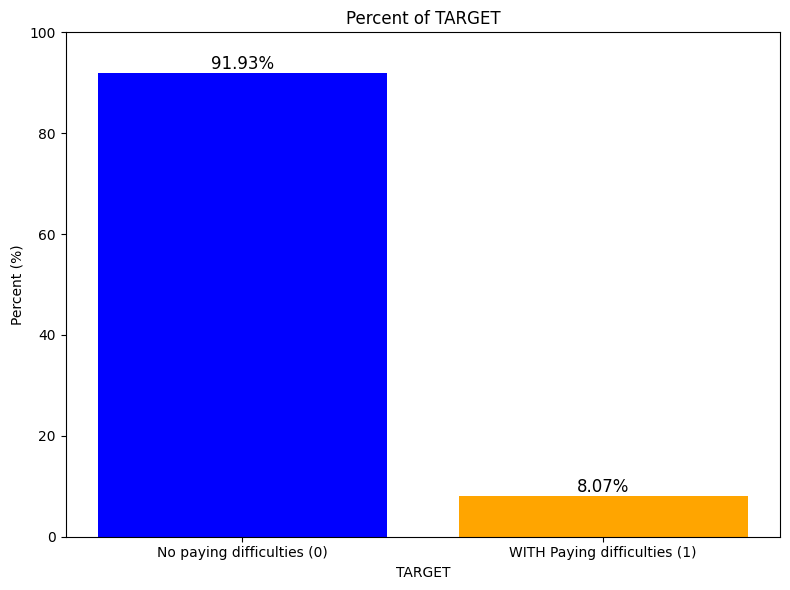

In [13]:
# Set up a grid and plot size
fig, ax = plt.subplots(figsize = (8,6)) 

# Create a bar chart
bar_plot= plt.bar(target_df_merge['TARGET'], target_df_merge['percent'], color=['blue', 'orange'])

# Adjust Y-axis limit:
plt.ylim(0, 100)

# Label bars with percentages
for bar in bar_plot:
    yvalue = bar.get_height()  # Obtain the height of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, yvalue + 0.02, f'{yvalue:.2f}%', 
             ha='center', va='bottom', fontsize=12)
    

# Title and labels
plt.xlabel('TARGET')
ax.set_xticks([0,1], labels=['No paying difficulties (0)', 'WITH Paying difficulties (1)']) #X-axis labeling
plt.ylabel('Percent (%)')
plt.title('Percent of TARGET')
plt.xticks(target_df_merge['TARGET'])  # Asegura que las etiquetas del eje X sean correctas

plt.tight_layout()
plt.show()

**Conclusions**:

In this case, 91% of the customers did not experience any difficulties in making their payments, while 8.07% of customers had delays in repaying their respective debts.

Therefore, it can be stated that the sample is **IMBALANCED**.

In [14]:
#Variable TARGET to categoric
df_loans['TARGET'] = df_loans['TARGET'].astype('category')

#### **III. MISSING DATA**

Before addressing missing values, it is essential to analyze their contribution to the sample, particularly with respect to the target variable. This involves considering that some variables may have little relevance, others might provide valuable information, or even reflect data that users chose not to provide. Therefore, it is crucial to distinguish between these cases to ensure that the quality of the data is not compromised during the analysis. This approach will enable more informed decisions when handling missing values.

In order to assess the completeness of the data, a chart has been created for each variable. These charts clearly highlight which variables contain a higher percentage of missing values, making it easier to analyze and make informed decisions about how to handle them.

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

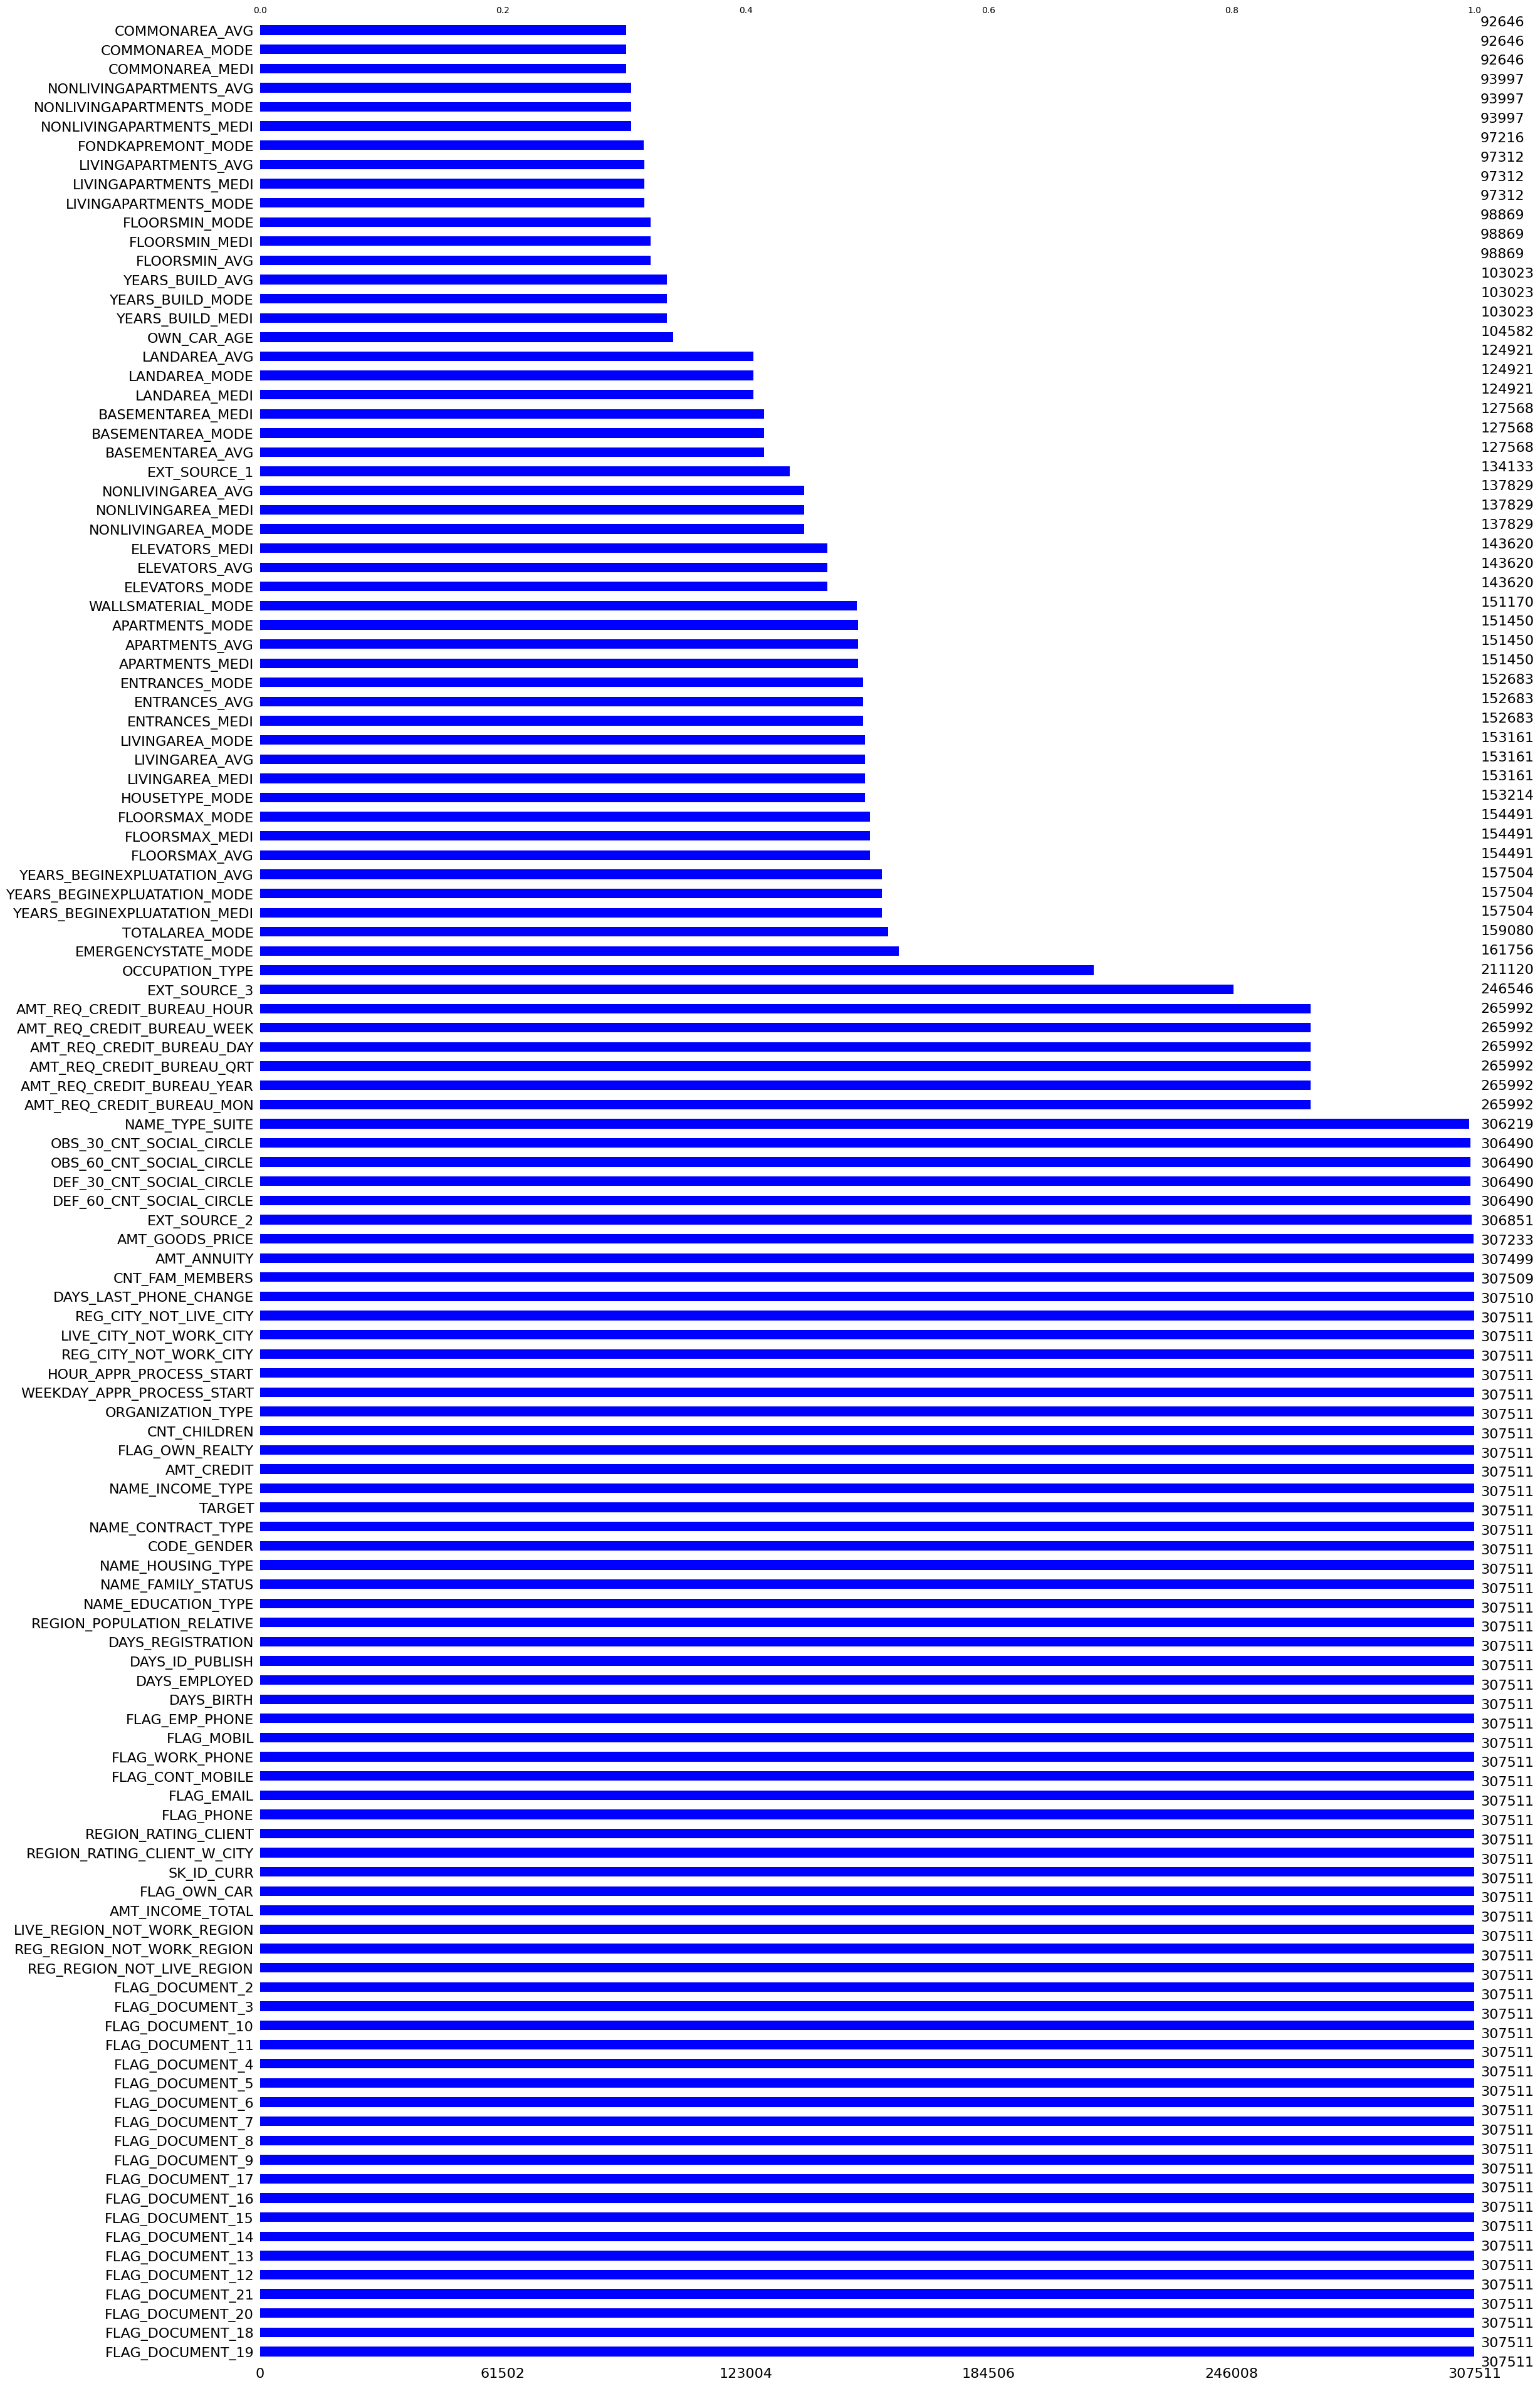

In [15]:
# To effectively visualize the variables with missing values (data completeness):
msno.bar(df_loans, filter="Top", sort = 'descending', color = 'blue')

# Count of missing values:
missing_df = df_loans.loc[:, df_loans.isna().any()].isna().sum()
missing_df

In [16]:
# Missing values in relation to the TARGET variable 
results =fa.null_relationship_target(df_loans)
print(results)

c:\Users\bris2\Desktop\GemaMaster\Aprendizaje\practica1_EDA\notebooks\../src\functions_src.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_percentages = df.groupby('TARGET')[col].apply(lambda x: (x.isnull().sum() / len(x)) * 100)


{'AMT_ANNUITY': TARGET
0    0.004245
1    0.000000
Name: AMT_ANNUITY, dtype: float64, 'AMT_GOODS_PRICE': TARGET
0    0.090914
1    0.084592
Name: AMT_GOODS_PRICE, dtype: float64, 'NAME_TYPE_SUITE': TARGET
0    0.432282
1    0.281974
Name: NAME_TYPE_SUITE, dtype: float64, 'OWN_CAR_AGE': TARGET
0    65.684187
1    69.482377
Name: OWN_CAR_AGE, dtype: float64, 'OCCUPATION_TYPE': TARGET
0    31.877419
1    25.289023
Name: OCCUPATION_TYPE, dtype: float64, 'CNT_FAM_MEMBERS': TARGET
0    0.000707
1    0.000000
Name: CNT_FAM_MEMBERS, dtype: float64, 'EXT_SOURCE_1': TARGET
0    56.107129
1    59.500504
Name: EXT_SOURCE_1, dtype: float64, 'EXT_SOURCE_2': TARGET
0    0.215080
1    0.209466
Name: EXT_SOURCE_2, dtype: float64, 'EXT_SOURCE_3': TARGET
0    19.558096
1    22.868077
Name: EXT_SOURCE_3, dtype: float64, 'APARTMENTS_AVG': TARGET
0    50.153173
1    57.542800
Name: APARTMENTS_AVG, dtype: float64, 'BASEMENTAREA_AVG': TARGET
0    57.981294
1    64.604230
Name: BASEMENTAREA_AVG, dtype: float64

The analysis of missing values in relation to the `TARGET` variable reveals several key insights:

1. **Significant Missing Values**: Some variables exhibit a very high percentage of missing values, particularly in `COMMONAREA_*` and `NONLIVINGAPARTMENTS_*` features, with up to 69% of values missing. This suggests that these features may not be reliable for analysis unless the missing data is imputed or removed.

2. **Missing Data Distribution**: The distribution of missing values across different variables is not uniform. For example, variables such as `NAME_FAMILY_STATUS` and `NAME_EDUCATION_TYPE` have no missing values, while others like `OCCUPATION_TYPE` and `OWN_CAR_AGE` have substantial missing data. This can potentially indicate that certain features are more prone to data collection or reporting issues.

3. **Relationship with TARGET**: 
   - Some features, such as `AMT_ANNUITY`, show a substantial proportion of missing values for clients with `TARGET=1` (indicating payment difficulties), suggesting a potential connection between missingness and the target outcome.
   
4. **Feature Correlations with TARGET**: 
   - Features such as `AMT_GOODS_PRICE`, `NAME_TYPE_SUITE`, and `OCCUPATION_TYPE` display different distributions of missing values across the two target categories. For example, `NAME_TYPE_SUITE` shows more missing values for clients with `TARGET=0` than for those with `TARGET=1`, suggesting a potential interaction between the presence of missing values and the likelihood of default.
   
5. **Data Types and Missingness**: 
   - Object-type columns, such as `NAME_CONTRACT_TYPE` and `CODE_GENDER`, typically have fewer missing values compared to numerical features like `AMT_ANNUITY` or `OWN_CAR_AGE`, indicating that categorical data may be less prone to missingness than numeric data.
   
6. **Imputation Strategy**: Given the high percentage of missing values in certain columns, imputing missing data using techniques like mean, median, or model-based approaches could be crucial. However, the relationship between missingness and the target should be carefully considered to avoid introducing bias into predictive models.

These conclusions suggest that handling missing data carefully is vital for improving model performance and ensuring the robustness of subsequent analysis. Consideration of how missingness correlates with the `TARGET` variable should guide the imputation strategy. 

*The handling of missing values will be addresed in the next Notebook*

#### **IV. STUDY OF THE INDEPENDENT VARIABLES**

In [17]:
# Apply the conversion to all columns that only contain 0s and 1s
df_loans = df_loans.apply(lambda x: x.astype(bool).astype(int) if x.isin([0, 1]).all() else x)

In [18]:
# Summary of independent variables
fa.data_summary(df_loans)

SK_ID_CURR (numeric) : (Type: int64) Range = [100002.00 to 456255.00], Mean = 278180.52

TARGET (boolean) : (Type: int64) Unique: [np.int64(1), np.int64(0)]

NAME_CONTRACT_TYPE (categoric) : (Type: object) Values: ['Cash loans' 'Revolving loans']

CODE_GENDER (categoric) : (Type: object) Values: ['M' 'F' 'XNA']

FLAG_OWN_CAR (categoric) : (Type: object) Values: ['N' 'Y']

FLAG_OWN_REALTY (categoric) : (Type: object) Values: ['Y' 'N']

CNT_CHILDREN (numeric) : (Type: int64) Range = [0.00 to 19.00], Mean = 0.42

AMT_INCOME_TOTAL (numeric) : (Type: float64) Range = [25650.00 to 117000000.00], Mean = 168797.92

AMT_CREDIT (numeric) : (Type: float64) Range = [45000.00 to 4050000.00], Mean = 599026.00

AMT_ANNUITY (numeric) : (Type: float64) Range = [1615.50 to 258025.50], Mean = 27108.57

AMT_GOODS_PRICE (numeric) : (Type: float64) Range = [40500.00 to 4050000.00], Mean = 538396.21

NAME_TYPE_SUITE (categoric) : (Type: object) Values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' '

In [19]:
df_loans.select_dtypes('float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,NaN,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


It can be observed that there is a wide variety of data types, particularly for numerical variables. In some cases, the variables are encoded, meaning they are actually categorical in nature, even though they are represented as numerical.

In [20]:
# To convert a column from float to object while preserving the NA values
df_loans["CNT_FAM_MEMBERS"] = df_loans["CNT_FAM_MEMBERS"].astype('object')

It has been detected that the column NT_FAM_MEMBERS contains values that are considered a priori as numerical, when in fact it is a categorical variable.

In [21]:
col_bool, col_cat, col_num = fa.categorize_columns(df_loans)

In [22]:
types_count = pd.DataFrame([['Boolean',len(col_bool)]
                                ,['Categoric',len(col_cat)]
                                ,['Numeric',len(col_num)]]
                               , columns=['Var_type','Count'])
types_count

,Var_type,Count
0,Boolean,33
1,Categoric,17
2,Numeric,72


The dataset has a predominance of numerical variables (72), suggesting that the analysis will focus on statistical techniques suitable for numerical data. There is a moderate number of boolean variables (33), which are useful for classification models. Categorical variables (17) are fewer but require encoding for use in models. In general, the dataset requires a balanced approach to handle the various data transformations based on their type. However, further analysis is needed, as it is possible that some variables classified as numerical may, in essence, be categorical.

C:\Users\bris2\AppData\Local\Temp\ipykernel_6668\156124524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Var_type', y='Count', data=types_count, palette="pink")


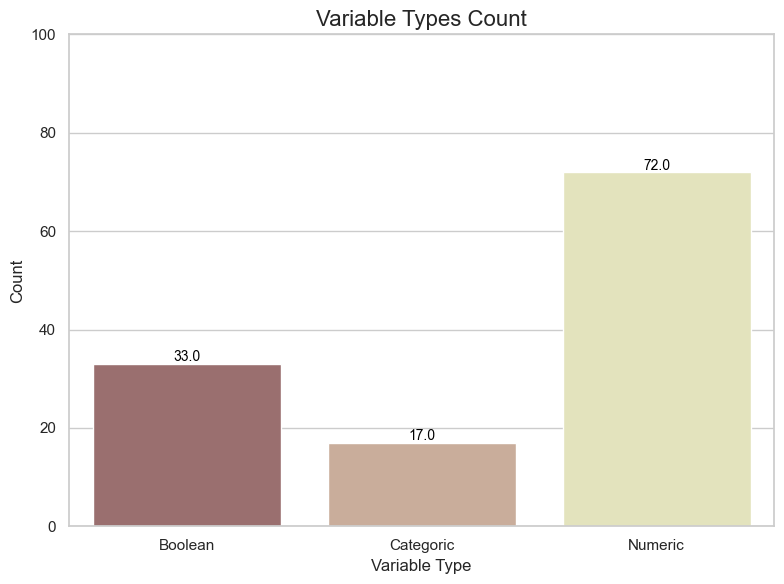

In [23]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Var_type', y='Count', data=types_count, palette="pink")

# Add labels with the total above each bar
for bar in ax.patches:  # `ax.patches` contains the bars of the plot
    total = bar.get_height()  # Get the height of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position centered
        total + 0.5,                        # Y position slightly above
        f'{total}',                         # Text with the total
        ha='center', fontsize=10, color='black'
    )

# Add titles and labels
plt.title('Variable Types Count', fontsize=16)
plt.xlabel('Variable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.ylim(0, 100)  # Establecer límite mínimo del eje x en 0

# Show the plot
plt.tight_layout()
plt.show()

This table clearly shows a higher number of numerical variables, followed by categorical variables, and lastly boolean variables.

In [24]:
for col in col_bool:  # columnas_bool es la lista con nombres de columnas booleanas
    print(f"Frecuencia relativa de {col}:")
    print(df_loans[col].value_counts(normalize=True))
    print()  #

Frecuencia relativa de TARGET:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_MOBIL:
FLAG_MOBIL
1    0.999997
0    0.000003
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_EMP_PHONE:
FLAG_EMP_PHONE
1    0.819889
0    0.180111
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_WORK_PHONE:
FLAG_WORK_PHONE
0    0.800632
1    0.199368
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_CONT_MOBILE:
FLAG_CONT_MOBILE
1    0.998133
0    0.001867
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_PHONE:
FLAG_PHONE
0    0.718934
1    0.281066
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_EMAIL:
FLAG_EMAIL
0    0.94328
1    0.05672
Name: proportion, dtype: float64

Frecuencia relativa de REG_REGION_NOT_LIVE_REGION:
REG_REGION_NOT_LIVE_REGION
0    0.984856
1    0.015144
Name: proportion, dtype: float64

Frecuencia relativa de REG_REGION_NOT_WORK_REGION:
REG_REGION_NOT_WORK_REGION
0    0

In this case, several variables follow an imbalanced distribution, particularly those related to the submitted documents. These variables show that, with the exception of FLAG_DOCUMENT_3, the rest had little to no contribution from the documentation. This behavior is consistent with the "TARGET" variable, as mentioned earlier, the sample is imbalanced. Clients who did not face payment difficulties were considered safer clients, and as a result, they were not asked for as much documentation. This may indicate that their risk profile was considered lower.

In [25]:
cat_vars = df_loans[col_cat].dtypes.reset_index().rename(columns={'index':'Var',0:'dtype'})
cat_vars

,Var,dtype
0,NAME_CONTRACT_TYPE,object
1,CODE_GENDER,object
2,FLAG_OWN_CAR,object
3,FLAG_OWN_REALTY,object
4,NAME_TYPE_SUITE,object
5,NAME_INCOME_TYPE,object
6,NAME_EDUCATION_TYPE,object
7,NAME_FAMILY_STATUS,object
8,NAME_HOUSING_TYPE,object
9,OCCUPATION_TYPE,object


In [26]:
cat_vars_count = cat_vars.dtype.value_counts().sort_values().reset_index()
cat_vars_count

,dtype,count
0,object,17


In [27]:
num_vars=df_loans[col_num].dtypes.reset_index().rename(columns={'index':'Var',0:'dtype'})
num_vars

,Var,dtype
0,SK_ID_CURR,int64
1,CNT_CHILDREN,int64
2,AMT_INCOME_TOTAL,float64
3,AMT_CREDIT,float64
4,AMT_ANNUITY,float64
...,...,...
67,AMT_REQ_CREDIT_BUREAU_DAY,float64
68,AMT_REQ_CREDIT_BUREAU_WEEK,float64
69,AMT_REQ_CREDIT_BUREAU_MON,float64
70,AMT_REQ_CREDIT_BUREAU_QRT,float64


In [28]:
num_vars_count = num_vars.dtype.value_counts().sort_values().reset_index().rename(columns={'dtype':'type','count':'count_num'})
num_vars_count

,type,count_num
0,int64,8
1,float64,64


C:\Users\bris2\AppData\Local\Temp\ipykernel_6668\2503613760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='type', y='count_num', data=num_vars_count, palette="Blues")


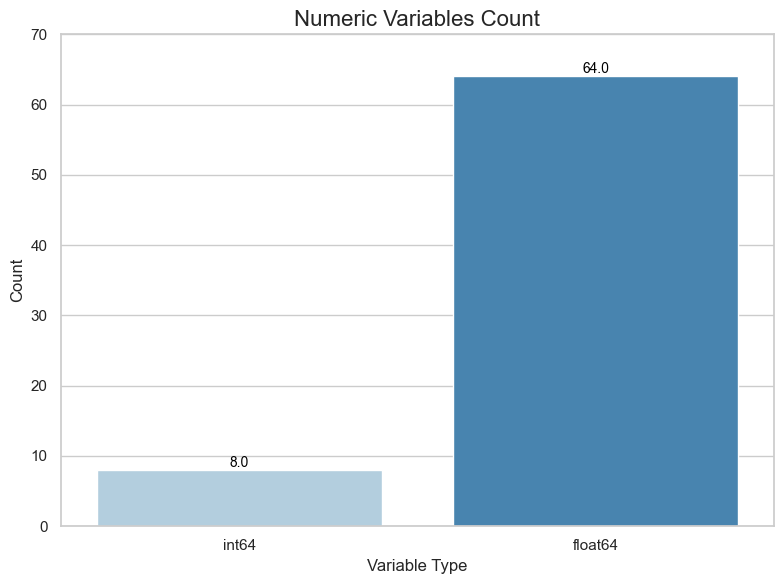

In [29]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='count_num', data=num_vars_count, palette="Blues")

# Add labels with the total above each bar
for bar in ax.patches:  # `ax.patches` contains the bars of the plot
    total = bar.get_height()  # Get the height of the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position centered
        total + 0.5,                        # Y position slightly above
        f'{total}',                         # Text with the total
        ha='center', fontsize=10, color='black'
    )

# Add titles and labels
plt.title('Numeric Variables Count', fontsize=16)
plt.xlabel('Variable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.ylim(0, 70)  # Establecer límites en el eje x

# Show the plot
plt.tight_layout()
plt.show()

This shows that most of the numerical variables are of type float64 (64), indicating they represent continuous data with decimals. Only 8 variables are of type int64, suggesting that some numerical variables are discrete, such as counters or indices. This reinforces the idea that the analysis should focus on continuous data, but also consider the necessary transformations for categorical and boolean variables. Overall, the dataset's numerical structure is primarily continuous.

### END NOTEBOOK 1

In [30]:
df_loans.to_csv('../data/Processing_data/application_data(1).csv')